In [3]:
import os
import h5py
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

In [15]:
%matplotlib inline

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

from pycbc import conversions
from pycbc import detector
import time
from pycbc.inference import io, models
from pycbc.workflow import WorkflowConfigParser

In [6]:
from pyRing import pyRing
from pyRing import likelihood
from pyRing import noise

/work/yifan.wang/virtualenv/ringdown/lib/python3.7/site-packages/pyRing/utils.py:16: UserWarning: surfinBH is not automatically installed due to possible conflicts. If you wish to use its functionalities, it needs to be installed separately.
  warnings.warn("surfinBH is not automatically installed due to possible conflicts. If you wish to use its functionalities, it needs to be installed separately.")


In [7]:
input_par = {'data-H1': '', 
             'data-L1': '', 
             'data-V1': '', 
             'ignore-data-filename': 0, 
             'download-data': 1, 
             'datalen-download': 4096.0, 
             'gw-data-find': 0, 
             'gw-data-type-H1': '', 
             'gw-data-type-L1': '', 
             'gw-data-type-V1': '', 
             'tag': 'CLN', 
             'channel-H1': 'GWOSC', 
             'channel-L1': 'GWOSC', 
             'channel-V1': 'GWOSC', 
             'config-file': 'config_gw150914_production.ini', 
             'run-type': 'full', 
             'output': 'GW150914_PROD1_Kerr_221_0M', 
             'run-tag': 'PROD1', 
             'screen-output': 0, 
             'pesummary': 1, 
             'trigtime': 1126259462.423235, 
             'detectors': ['H1', 'L1'], 
             'ref-det': 'H1', 
             'sky-frame': 'equatorial', 
             'acf-H1': '', 
             'acf-L1': '', 
             'acf-V1': '', 
             'psd-H1': '', 
             'psd-L1': '', 
             'psd-V1': '', 
             'signal-chunksize': 4.0, 
             'noise-chunksize': 4.0, 
             'window-onsource': 0, 
             'window': 1, 
             'alpha-window': 0.1, 
             'sampling-rate': 4096.0, 
             'f-min-bp': 20.0, 
             'f-max-bp': 2038.0, 
             'bandpassing': 1, 
             'fft-acf': 1, 
             'acf-simple-norm': 1, 
             'no-lognorm': 0, 
             'truncate': 1, 
             'analysis-duration': 0.1, 
             'analysis-duration-n': 409, 
             'zero-noise': 0, 
             'gaussian-noise': '', 
             'gaussian-noise-seed': -1, 
             'gaussian-noise-white-sigma': 1e-21, 
             'chisquare-computation': 0, 
             'non-stationarity-check': 0, 
             'onsource-ACF': 0, 
             'noise-averaging-method': 'mean', 
             'Dirac-comb': 0, 
             'Zeroing-data': 0, 
             'maxent-psd': '', 
             'PSD-investigation': 0, 
             'injection-parameters': None, 
             'injection-approximant': '', 
             'inject-n-ds-modes': {'t': 1}, 
             'inject-area-quantization': 0, 
             'inject-charge': 0, 
             'injection-scaling': 1.0, 
             'injection-T': 64.0, 
             'template': 'Kerr', 
             'single-mode': None, 
             'n-ds-modes': {'t': 1}, 
             'ds-ordering': 'freq', 
             'kerr-modes': [(2, 2, 2, 0), (2, 2, 2, 1)], 
             'reference-amplitude': 1e-21, 
             'spheroidal': 0, 
             'qnm-fit': 1, 
             'coherent-n': 0, 
             'amp-non-prec-sym': 1, 
             'max-Kerr-amp-ratio': 0.0, 
             'TGR-overtones-ordering': 'Unordered', 
             'domega-tgr-modes': None, 
             'dtau-tgr-modes': None, 
             'area-quantization': 0, 
             'tau-AQ': 0, 
             'prior-reweight': 0, 
             'ParSpec': 0, 
             'ParSpec_Dmax_TGR': 2, 
             'ParSpec_Dmax_charge': 0, 
             'EsGB': 0, 
             'charge': 0, 
             'gr-time-prior': 1, 
             'dist-flat-prior': 0, 
             'ds-amp-flat-prior': 0, 
             'mf-time-prior': 67.92493161247017, 
             'nonref-det': 'L1'}

In [8]:
model = pyRing.KerrModel(modes=input_par['kerr-modes'],**input_par)


Trigtime in H1: 1126259462.423235


Reading data...

Using GWPY to download data.
Fetched 1 URLs from www.gw-openscience.org for [1126257414 .. 1126261510))
Reading data... [Done]

Loaded channel GWOSC starting at 1126257414.0 length 4096.0s.
Bandpassing the raw strain between [20.0, 2038.0] Hz.


KeyboardInterrupt: 

# Some useful formula

# Time domain likelihood

$\ln \mathcal{L} = -\frac{1}{2} \sum_{i,j}n_iC_{ij}^{-1}n_j$ + const.

where

$C_{ij} = \rho(|i-j|)$ 

which is ACF (autocovariance function)

# The relation to PSD

 $\frac{1}{2}S_n(f) = \int_{-\infty}^{\infty} d\tau \rho(\tau) \exp^{i2\pi f  \tau}$

# Explore ACF

In [9]:
acf_h1 = np.loadtxt('./GW150914_PROD1_Kerr_221_0M/Noise/ACF_TD_H1_1126257414_4096_4.0_4096.0.txt')
acf_l1 = np.loadtxt('./GW150914_PROD1_Kerr_221_0M/Noise/ACF_TD_L1_1126257414_4096_4.0_4096.0.txt')

In [10]:
1 / (acf_h1[1,0] - acf_h1[0,0])

4096.0

In [11]:
plt.figure(figsize=[16,10])
plt.plot(acf_h1[:,0],acf_h1[:,1])
#plt.legend()
plt.title('H1 ACF')

Text(0.5, 1.0, 'H1 ACF')

# Plot the 0.1s

In [12]:
plt.figure(figsize=[16,10])
index = int(0.1 * 4096)
plt.plot(acf_h1[:index,0],acf_h1[:index,1])
#plt.legend()
plt.title('H1 ACF')

Text(0.5, 1.0, 'H1 ACF')

# Plot the difference

In [13]:
# load the PyCBC posterior file
fp = io.loadfile('../extract.hdf', 'r')
cbcpsds = fp.read_psds()
    
def plot_diff(det='L1',cbcpsds=cbcpsds):
    '''
    Input
    ---------------------------------------------
    cbcpsds: a dictionary output by fp.read_psds()
    
    '''
    acf = np.loadtxt('./GW150914_PROD1_Kerr_221_0M/Noise/ACF_TD_'+str(det)+'_1126257414_4096_4.0_4096.0.txt')
    dt = acf[1,0] - acf[0,0]
    srate = 1 / dt
    chunk_size = 4
    Npoints = int (srate * chunk_size)

    #Fourier Transformation
    freqs_default = np.fft.rfftfreq(Npoints, d=dt)
    psd_acf = 2*np.real(np.fft.rfft(acf_h1[:,1]*dt))
    

    
    plt.figure(figsize=[16,10])
    plt.plot(freqs_default,psd_acf,label='PyRing '+str(det)+' PSD from ACF')
    plt.plot(cbcpsds[det].sample_frequencies,cbcpsds[det],label='PyCBC '+str(det)+' PSD')
    plt.xlim(10,)
    plt.xlabel('Frequency / Hz')
    plt.ylabel('PSD / Hz')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(loc='best')
    plt.title(det)
    
    pyringpsd_interp = interp1d(freqs_default, psd_acf)
    
    plt.figure(figsize=[16,10])
    freqs = cbcpsds[det].sample_frequencies.data
    plt.plot(freqs,(cbcpsds[det].data  - pyringpsd_interp(freqs) )/cbcpsds[det].data)
    plt.xlabel('Frequency / Hz')
    plt.ylabel('PSD / Hz')
    plt.xscale('log')
    plt.yscale('log')
    plt.axvline(x=250,color='black',ls='--',label='250Hz')
    plt.title('(PyRing PSD - PyCBC PSD) / PyCBC Psd')
    plt.ylim(1e-2,)
    plt.xlim(240,260)
    plt.legend(loc='best')

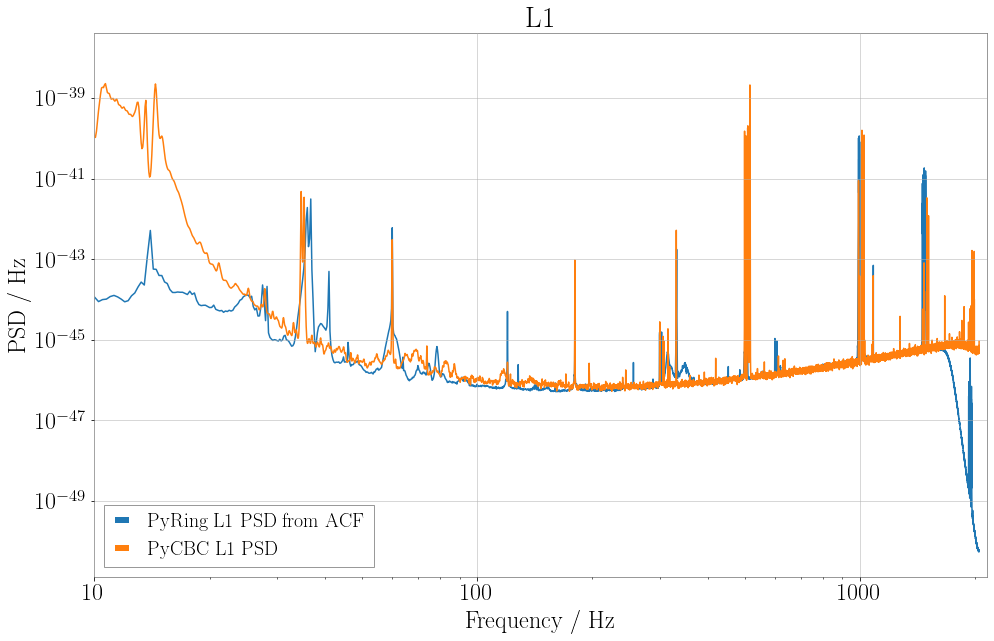

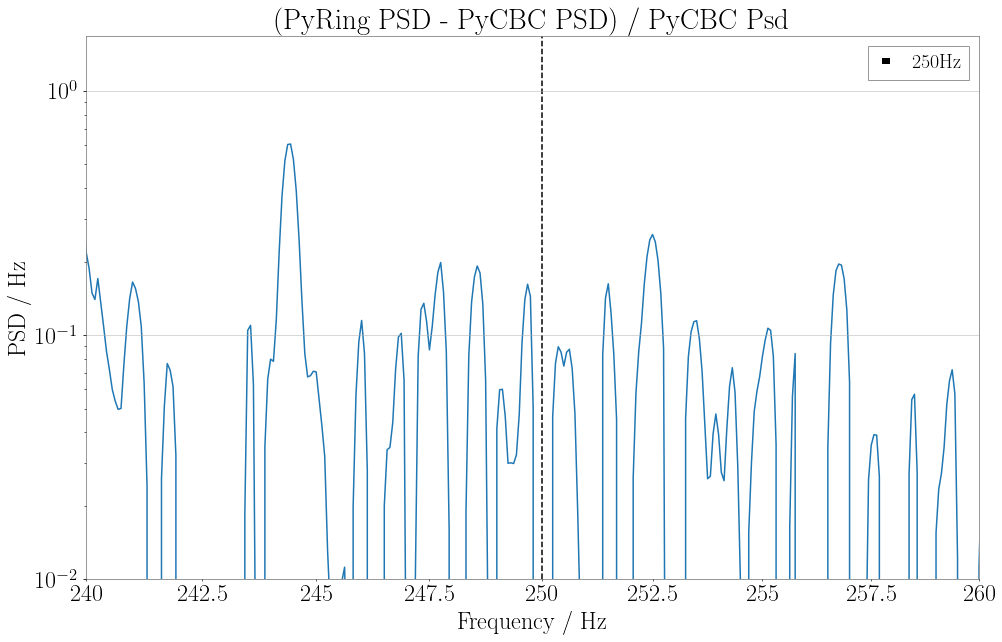

In [17]:
plot_diff('L1')

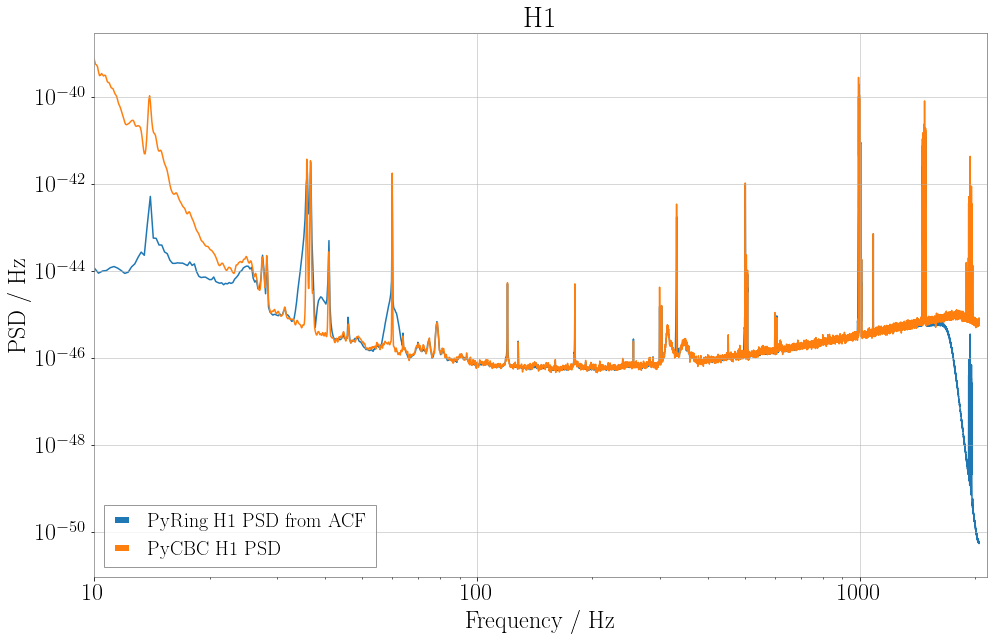

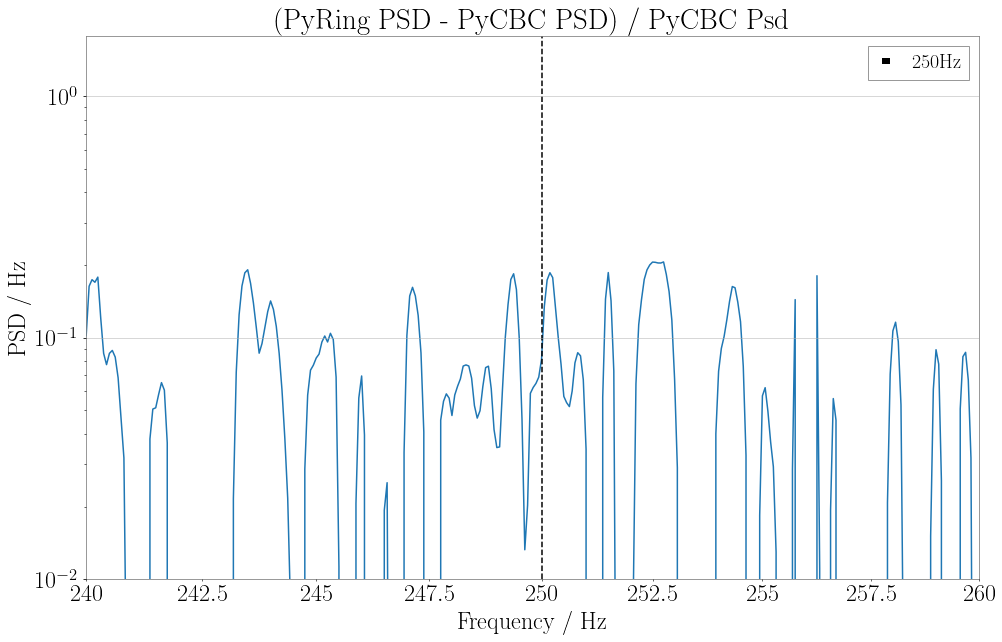

In [18]:
plot_diff('H1')

# Max Isi Ringdown PSD

In [22]:
mi_psd_h1 = pd.read_csv('./mi-psd-h1.csv')
mi_psd_l1 = pd.read_csv('./mi-psd-l1.csv')

In [25]:
mi_psd_h1.index.values

array([   0,    1,    2, ..., 8190, 8191, 8192])

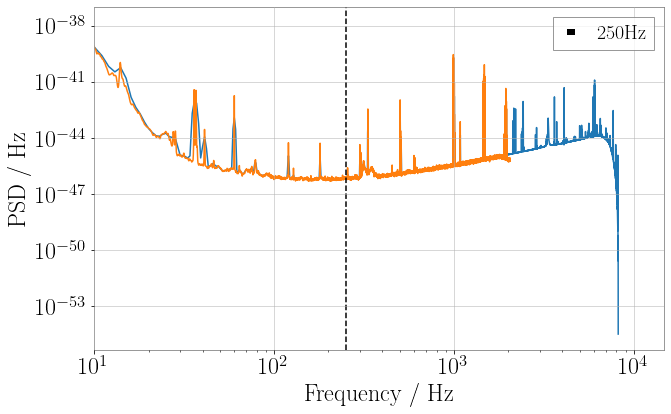

In [32]:
plt.plot(mi_psd_h1.index.values,mi_psd_h1.values)
plt.plot(cbcpsds['H1'].sample_frequencies,cbcpsds['H1'])
plt.xlabel('Frequency / Hz')
plt.ylabel('PSD / Hz')
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=250,color='black',ls='--',label='250Hz')
#    plt.title('(PyRing PSD - PyCBC PSD) / PyCBC Psd')
#plt.ylim(1e-2,)
plt.xlim(10,)
plt.legend(loc='best')

In [34]:
len(mi_psd_h1.index.values)

8193

In [36]:
len(mi_psd_h1.values)

8193

In [42]:
mi_psd_h1['0'].values

array([3.87265907e-41, 1.90725892e-41, 3.24810899e-42, ...,
       1.87658099e-53, 4.00686120e-54, 3.01847640e-55])

In [43]:
mi_interp = interp1d(mi_psd_h1.index.values,mi_psd_h1['0'].values)

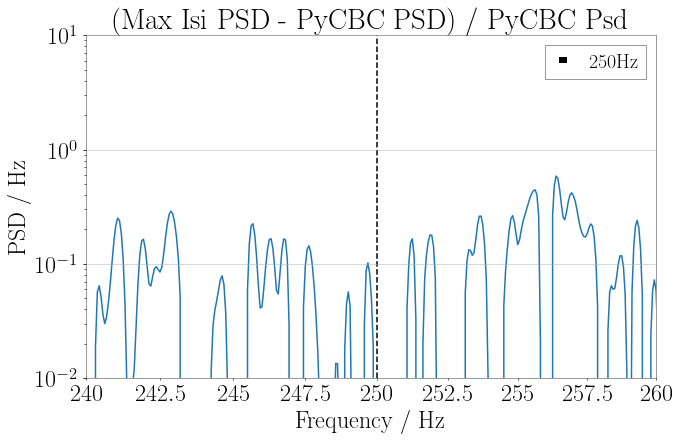

In [52]:
plt.plot(cbcpsds['H1'].sample_frequencies,
         (mi_interp(cbcpsds['H1'].sample_frequencies)-cbcpsds['H1'])/cbcpsds['H1'])
plt.xlabel('Frequency / Hz')
plt.ylabel('PSD / Hz')
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=250,color='black',ls='--',label='250Hz')
plt.title('(Max Isi PSD - PyCBC PSD) / PyCBC Psd')
plt.ylim(1e-2,10)
plt.xlim(240,260)
plt.legend(loc='best')

In [49]:
det= 'H1'

In [50]:
acf = np.loadtxt('./GW150914_PROD1_Kerr_221_0M/Noise/ACF_TD_'+str(det)+'_1126257414_4096_4.0_4096.0.txt')
dt = acf[1,0] - acf[0,0]
srate = 1 / dt
chunk_size = 4
Npoints = int (srate * chunk_size)

#Fourier Transformation
freqs_default = np.fft.rfftfreq(Npoints, d=dt)
psd_acf = 2*np.real(np.fft.rfft(acf_h1[:,1]*dt))

pyringpsd_interp = interp1d(freqs_default, psd_acf)

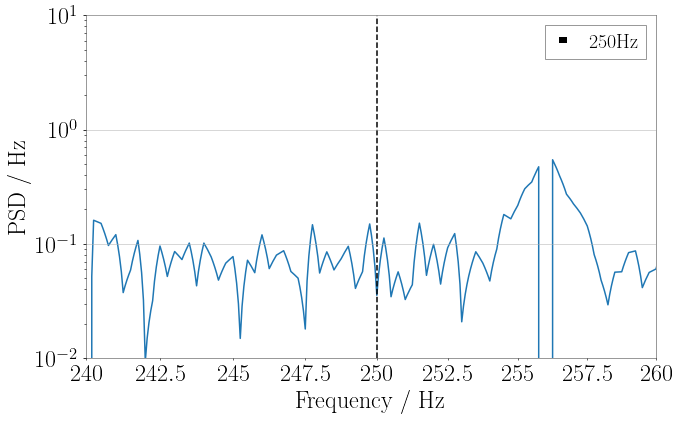

In [51]:
plt.plot(cbcpsds['H1'].sample_frequencies,
         (mi_interp(cbcpsds['H1'].sample_frequencies)-pyringpsd_interp(cbcpsds['H1'].sample_frequencies))/pyringpsd_interp(cbcpsds['H1'].sample_frequencies))
plt.xlabel('Frequency / Hz')
plt.ylabel('PSD / Hz')
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=250,color='black',ls='--',label='250Hz')
#    plt.title('(PyRing PSD - PyCBC PSD) / PyCBC Psd')
plt.ylim(1e-2,10)
plt.xlim(240,260)
plt.legend(loc='best')

# Read in PyCBC results with PyRing PSD

In [55]:
from pycbc import conversions

In [57]:
def snr_from_pos(hdfdir):
    fp = io.loadfile(hdfdir, 'r')
    cp = fp.read_config_file()
    data = fp.read_data()
    psds = fp.read_psds()
    model = models.read_from_config(cp, data=data, psds=psds)
    samples = fp.read_samples(list(fp['samples'].keys()))
    maxlidx = samples['loglikelihood'].argmax()
    maxlparams = {p: samples[p][maxlidx] for p in model.variable_params}
    model.update(**maxlparams)
    model.loglikelihood
    return (2*model.loglr)**0.5

In [58]:
time = np.linspace(-1.46, 1.47, 13) 
t0 = 1126259462.4085495

snr_220 = {}
for i, dt in enumerate(time):
    t = t0 + dt/1000
    try:
        snr = snr_from_pos('./../r4-psds/t'+str(i)+'/220/result.hdf')
        snr_220[t] = snr
    except:
        print('The '+str(i)+'th is not finished.')
        pass

In [59]:
snr_220

{1126259462.4070895: 333.56581755091395,
 1126259462.4073336: 332.2964268845177,
 1126259462.407578: 328.387406464865,
 1126259462.4078221: 325.76153585196795,
 1126259462.4080663: 321.8663719094876,
 1126259462.4083104: 318.19696461141575,
 1126259462.4085546: 312.59866081031095,
 1126259462.4087987: 308.0505886216833,
 1126259462.4090428: 301.35845280437593,
 1126259462.409287: 296.5705017940791,
 1126259462.409531: 289.74056595011615,
 1126259462.4097755: 283.3113754368694,
 1126259462.4100196: 276.6181471881234}